Para el laboratorio hizo uso del para entrenar el modelo de **Regresion Logistica** aplicado regularizacion y predecir si una planta esta enferma o no.


Primero se importo todas las librerias necesarias:

In [1]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80% de los datos
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## Carga de datos del dataset


In [23]:
#cargamos el dataset a un dataframe de pandas
df = pd.read_csv('dataset_plants2.csv', delimiter=',')

#mostramos el dataset
df

,Soil_Moisture,Sunlight_Hours,Soil_pH,Ambient_Temperature,Fertilizer_Level,Plant_Type,Plant_Age,Plant_Height,Pesticide_Level,Air_Quality,Watering_Frequency,Days_Since_Last_Treatment,Plant_Health_Status
0,52.928810,2.311578,4.755279,24.370716,46.337959,2,25,95.102245,13.665930,9.816439,1,29,0
1,62.911362,5.305338,3.699277,10.190008,35.571374,1,25,38.430746,7.459307,1.010680,4,7,0
2,56.165803,5.305340,5.018660,28.210874,12.322256,5,10,20.332484,0.818354,6.165716,4,27,0
3,52.692991,5.943108,3.722044,24.244173,22.939882,2,14,111.966643,9.790885,4.360190,3,15,1
4,45.419288,4.160941,8.617844,24.058742,17.994179,7,6,75.460983,9.360760,5.250466,4,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,54.349447,6.410908,8.448130,31.278619,41.896572,6,36,31.499863,8.768719,2.934843,6,26,0
23096,35.310256,6.821160,8.157394,27.256309,2.608973,4,49,89.275538,0.432335,2.018008,3,8,0
23097,69.488893,3.746046,6.557157,23.962508,13.338819,6,46,16.158036,20.867251,8.800882,3,5,0
23098,38.764683,9.596214,7.175161,17.811348,18.542399,2,51,10.245917,11.608941,3.663833,6,1,0


## Analisis del dataset
Hacemos un analisis del dataset mostrando su informacion usando la funcion de `info()`:

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23100 entries, 0 to 23099
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Soil_Moisture              23100 non-null  float64
 1   Sunlight_Hours             23100 non-null  float64
 2   Soil_pH                    23100 non-null  float64
 3   Ambient_Temperature        23100 non-null  float64
 4   Fertilizer_Level           23100 non-null  float64
 5   Plant_Type                 23100 non-null  int64  
 6   Plant_Age                  23100 non-null  int64  
 7   Plant_Height               23100 non-null  float64
 8   Pesticide_Level            23100 non-null  float64
 9   Air_Quality                23100 non-null  float64
 10  Watering_Frequency         23100 non-null  int64  
 11  Days_Since_Last_Treatment  23100 non-null  int64  
 12  Plant_Health_Status        23100 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 2.3 MB


## Separacion del 80% de los datos para entrenamiento y 20% para pruebas

Haremos uso de la libreria `sklearn` haciendo uso de su funcion `train_test_split()`, donde recibe como parametros:

`Arrays o matrices de características (X): `Estos son los datos que se utilizarán para hacer predicciones. Por lo general, son las variables independientes o características del conjunto de datos.

`test_size (opcional):` Este parámetro especifica el tamaño del conjunto de prueba. Puede ser un número decimal entre 0 y 1, que representa el porcentaje del conjunto de datos que se asignará al conjunto de prueba, o puede ser un entero que representa el número absoluto de muestras en el conjunto de prueba. Por ejemplo, si test_size=0.2, se asignará el 20% del conjunto de datos al conjunto de prueba.

`train_size (opcional):` Este parámetro especifica el tamaño del conjunto de entrenamiento. Al igual que test_size, puede ser un número decimal entre 0 y 1 o un entero que representa el número absoluto de muestras en el conjunto de entrenamiento. Si no se proporciona, se calcula automáticamente como 1 - test_size.

`random_state (opcional):` Este parámetro permite establecer una semilla para la generación de números pseudoaleatorios. Esto garantiza que la división de los datos sea reproducible. Si se establece en un número entero, el resultado será el mismo cada vez que se ejecute el código.

In [25]:
print(test_dataset.columns)


Index(['Soil_Moisture,Sunlight_Hours,Soil_pH,Ambient_Temperature,Fertilizer_Level,Plant_Type,Plant_Age,Plant_Height,Pesticide_Level,Air_Quality,Watering_Frequency,Days_Since_Last_Treatment,Plant_Health_Status'], dtype='object')


In [22]:
try:
    X_test = test_dataset.drop(['Plant_Health_Status'], axis=1).values
except KeyError as e:
    print(f"Error: {e}")
    print(test_dataset.columns)  # Esto mostrará las columnas actuales para diagnóstico


Error: "['Plant_Health_Status'] not found in axis"
Index(['Soil_Moisture,Sunlight_Hours,Soil_pH,Ambient_Temperature,Fertilizer_Level,Plant_Type,Plant_Age,Plant_Height,Pesticide_Level,Air_Quality,Watering_Frequency,Days_Since_Last_Treatment,Plant_Health_Status'], dtype='object')


In [26]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

#Separamos en X_test los datos, pero dropeando nuestra y que seria 'Plant_Health_Status'
X_test = test_dataset.drop(['Plant_Health_Status'], axis=1).values
#Separamos en y_test los datos, pero solo cargando la columna de 'Plant_Health_Status', ya que esa sera nuestra y
y_test = test_dataset['Plant_Health_Status'].values
m_test = len(y_test)

# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'Plant_Health_Status' para y_train
X_train = train_dataset.drop(['Plant_Health_Status'], axis=1).values
y_train = train_dataset['Plant_Health_Status'].values
m_train = len(y_train)


#Imprimimos algunos datos:


print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(df)))

 
El 80% de ejemplos para entrenamiento son la cantidad de: 18480 de ejemplos
El 20% de ejemplos para pruebas son la cantidad de: 4620 de ejemplos
La cantidad total de ejemplos es de: 23100 de ejemplos


## Funcion para la Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso

Hacemos el uso de la siguiente funcion para normalizar los datos:

In [27]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada filaa de X
    #media de cada columna
    mu = np.mean(X, axis = 0)
    
    #desviacion estandar de cada fila de X
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

## Funcion para el calculo de la sigmoide

También conocida como la función logística, es una función matemática que toma cualquier número real como entrada y devuelve un valor en el rango de 0 a 1. Donde nuestra **Z** es nuestra hipotesis.

In [28]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

## Funcion de calculo de costo con regularizacion

Para la regularizacion se implemento la suma de `+(lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))` a nuestra ecuacion de costo

In [29]:
def calcularCostoCR(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    
    # temp = theta.copy()
    # temp[0] = 0
    
    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # Calculamos el término de regularización (sin incluir el primer término de theta)
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Sumamos el término de regularización al costo total
    J += regularization_term

    return J

### Funcion de descenso por el gradiente con regularizacion


Tambien introducimos el parametro lambda_ para aplicar regularizacion.

Para el calculo de nuestras thetas sera

para Theta 0 sera `theta[0] -= alpha * gradient[0]`.

Para las demas thetas sera `theta[1:] -= alpha * (gradient[1:]+ regularization_term)`

donde nuestra gradiente es `gradient = (1 / m) * X.T.dot(h - y)`

In [30]:
def descensoGradienteCR(theta, X, y, alpha, lambda_, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        
        # Calcula el gradiente descendente sin regularización
        gradient = (1 / m) * X.T.dot(h - y)
        
        # Calcula el término de regularización (excepto para el término de sesgo theta[0])
        regularization_term = (lambda_ / m) * theta[1:]
        
        # theta[0] -= alpha * (1 / m) * np.sum(h - y)
        theta[0] -= alpha * gradient[0]
        theta[1:] -= alpha * (gradient[1:]+ regularization_term)

        # Calcula y guarda el costo en cada iteración
        J_history.append(calcularCostoCR(theta, X, y, lambda_))
        
    return theta, J_history

## Funcion de calculo de costo sin regularizacion

In [31]:
def calcularCostoSR(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    
    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

### Funcion de descenso por el gradiente sin regularizacion

In [32]:
def descensoGradienteSR(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCostoSR(theta, X, y))
    return theta, J_history

## 1. Usando regularizacion

La regularización es una técnica utilizada en el aprendizaje automático para prevenir el **sobreajuste (overfitting)** de un modelo a los datos de entrenamiento.

El sobreajuste ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento y captura el ruido o las fluctuaciones aleatorias en los datos en lugar de aprender la verdadera relación subyacente entre las características y la variable objetivo. Esto puede resultar en un rendimiento deficiente del modelo cuando se enfrenta a nuevos datos que no formaban parte del conjunto de entrenamiento.

### 1.1 Regresion Logistica

Carga de los datos para la regresion logistica:

In [33]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testCR = X_test.copy()
y_testCR = y_test.copy()
m_test_CR = len(y_testCR)

#estos datos seran usados para el test
X_trainCR = X_train.copy()
y_trainCR = y_train.copy()
m_train_CR = len(y_trainCR)

#Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_trainCR[i, 0], 
        X_trainCR[i, 1],
        X_trainCR[i, 2],
        X_trainCR[i, 3], 
        X_trainCR[i, 4], 
        X_trainCR[i, 5],
        X_trainCR[i, 6], 
        X_trainCR[i, 7], 
        X_trainCR[i, 8], 
        X_trainCR[i, 9], 
        X_trainCR[i, 10], 
        y_trainCR[i]
    ))

#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(df)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      37       5         8        24      15       8      28      15      11        10       3           1
      70       6         3        19       6       6      44     126      12         7       1           1
      39      10         5        22      35       1       4     140      26         3       3           1
      46      10         6        12      31       5      15     103      28         3       3           1
      24       2         7        24       2       1      22     136      28         5       6           1
      61       5         7        20      31       1      38      23      20         2       6           1
      28       7         8        16       3       7      35      82      19         3       6           1
      23       7         7        

#### 1.1.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

Almacenando los datos normalizados en **X_norm** usando la funcion **featureNormaliza()**, normalizando los datos de X_train

In [34]:
X_norm_CR, mu_CR, sigma_CR= featureNormalize(X_trainCR)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm_CR[i, 0], 
        X_norm_CR[i, 1],
        X_norm_CR[i, 2], 
        X_norm_CR[i, 3], 
        X_norm_CR[i, 4], 
        X_norm_CR[i, 5],
        X_norm_CR[i, 6],
        X_norm_CR[i, 7], 
        X_norm_CR[i, 8], 
        X_norm_CR[i, 9], 
        X_norm_CR[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
  -0.731  -0.580     1.263     0.176  -0.727   1.152   0.144  -1.618  -0.422     1.725  -0.282
   1.178   0.055    -1.649    -0.493  -1.319   0.375   1.229   1.155  -0.416     0.494  -1.454
  -0.603   1.727    -0.841    -0.060   0.642  -1.567  -1.485   1.505   1.258    -1.024  -0.282
  -0.256   1.639    -0.257    -1.428   0.419  -0.013  -0.738   0.575   1.466    -0.862  -0.282
  -1.517  -1.509     0.861     0.223  -1.570  -1.567  -0.263   1.391   1.453    -0.180   1.475
   0.659  -0.352     0.363    -0.278   0.396  -1.567   0.822  -1.429   0.608    -1.417   1.475
  -1.267   0.638     0.870    -0.841  -1.552   0.763   0.619   0.053   0.449    -0.983   1.475
  -1.535   0.235     0.666    -0.792   0.708  -1.178   0.483   1.223   0.361    -0.089   0.304
   0.833   0.393     0.350     0.

#### 1.1.2 Agregamos la columna de unos a nuestra matriz

In [35]:
X_ready_CR = np.concatenate([np.ones((m_train_CR, 1)), X_norm_CR], axis=1)

# print(len(X_ready[0]))

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready_CR[i, 0],
        X_ready_CR[i, 1], 
        X_ready_CR[i, 2], 
        X_ready_CR[i, 3],
        X_ready_CR[i, 4], 
        X_ready_CR[i, 5], 
        X_ready_CR[i, 6], 
        X_ready_CR[i, 7], 
        X_ready_CR[i, 8], 
        X_ready_CR[i, 9], 
        X_ready_CR[i, 10], 
        X_ready_CR[i, 11]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.731    -0.580     1.263   0.176  -0.727   1.152   0.144  -1.618    -0.422   1.725  -0.282
   1.000   1.178     0.055    -1.649  -0.493  -1.319   0.375   1.229   1.155    -0.416   0.494  -1.454
   1.000  -0.603     1.727    -0.841  -0.060   0.642  -1.567  -1.485   1.505     1.258  -1.024  -0.282
   1.000  -0.256     1.639    -0.257  -1.428   0.419  -0.013  -0.738   0.575     1.466  -0.862  -0.282
   1.000  -1.517    -1.509     0.861   0.223  -1.570  -1.567  -0.263   1.391     1.453  -0.180   1.475
   1.000   0.659    -0.352     0.363  -0.278   0.396  -1.567   0.822  -1.429     0.608  -1.417   1.475
   1.000  -1.267     0.638     0.870  -0.841  -1.552   0.763   0.619   0.053     0.449  -0.983   1.475
   1.000  -1.535     0.235     0.666  -0.7

#### 1.1.3 Descenso por el gradiente

Al igual que regresion lineal se aplicara el descenso por la gradiente, con la diferencia que aqui se hara el uso de la funcion **sigmoid()**:

##### 1.1.3.1 Cálculo del costo $J(\theta)$

hacemos uso de la funcion def `calcularCosto(X, y, theta, lambda_)`;

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [37]:
theta_CR=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9, 1.3])
theta_CR1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 7.2, 4.5])

lambda_ = 1000
print(theta_CR.shape[0])
print(f"########################################################################################################")
print(f"con theta:{ theta_CR } se obtiene un costo de: {calcularCostoCR(theta_CR, X_ready_CR, y_trainCR, lambda_)}")
print(f"########################################################################################################")
print(f"con theta:{ theta_CR1 } se obtiene un costo de: {calcularCostoCR(theta_CR ,X_ready_CR, y_trainCR, lambda_)}")

13
########################################################################################################
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9 1.3] se obtiene un costo de: 4.867096838479704
########################################################################################################
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3 8.  1.7 0.7 7.1 7.2 4.5] se obtiene un costo de: 4.867096838479704


##### 1.1.3.2Descenso por el gradiente

Hacemos uso de la funcion para hacer el calculo del descenso por el gradiente y asi encontrar nuestras **Thetas**, se hizo la modificacion para que la funcion ahora reciba el parametro de ``lamda_``

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.00009.

In [38]:
#creamos un theta con 19 columnas de ceros
theta_CR = np.zeros(len(X_ready_CR[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite_CR = 15000
alpha_CR = 0.0009
lambda_CR = 1000

theta_CR, J_historico_CR = descensoGradienteCR(theta_CR, X_ready_CR, y_trainCR, alpha_CR, lambda_CR, num_ite_CR)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_CR:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_CR[-1]} ")

########################################################################################################
Los valores de theta calculados son:
theta 1: -0.0087816980914305
theta 2: -0.0008470941538557115
theta 3: -0.010826529985183433
theta 4: 0.0004455250977259393
theta 5: 0.010088684754535986
theta 6: 0.003067494627844552
theta 7: 0.001781924226849901
theta 8: 0.01752676829321484
theta 9: -0.01001502418285656
theta 10: 0.002111159583997897
theta 11: 0.012481716924160344
theta 12: 0.01289247908535001
theta 13: 0.0014561490496430435
########################################################################################################
con un costo de: 0.6929844571976718 


#### 1.1.4 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

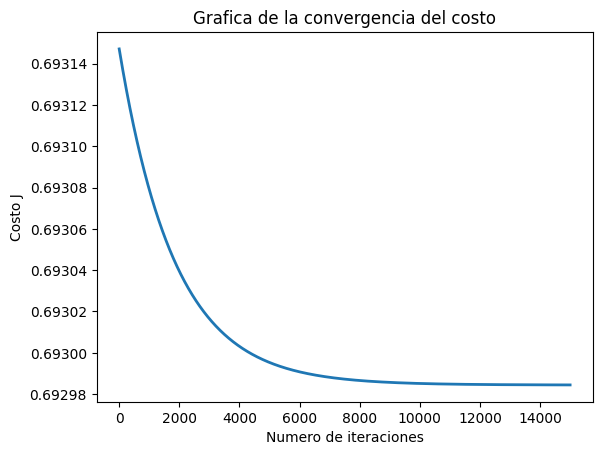

In [39]:
pyplot.plot(np.arange(len(J_historico_CR)), J_historico_CR, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Haciendo la prueba con un ejemplo

In [41]:
X_array_CR = [20,5.5,5.7,15.5,53,2,18,47.4,4.5,8,3,19,1]
X_array_copy_CR = X_array_CR.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array_CR[1:] = (X_array_CR[1:] - mu_CR) / sigma_CR

resultados_CR = sigmoid(np.dot(X_array_CR, theta_CR)) 

print(f"Una planta con las caracteristicas: {X_array_copy_CR} ")
print(f'Tiene una probabilidad de estar enferma de: {resultados_CR * 100} %')

print(f"Con valores de theta: { theta_CR }")

Una planta con las caracteristicas: [20, 5.5, 5.7, 15.5, 53, 2, 18, 47.4, 4.5, 8, 3, 19, 1] 
Tiene una probabilidad de estar enferma de: 50.56835884958228 %
Con valores de theta: [-0.0087817  -0.00084709 -0.01082653  0.00044553  0.01008868  0.00306749
  0.00178192  0.01752677 -0.01001502  0.00211116  0.01248172  0.01289248
  0.00145615]


#### 1.1.5 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

##### 1.1.5.1 Definiendo nuestro umbral clasificador
Donde:

* Si $h(\theta)$ >= 0.5, predice "y = 1".
* Si $h(\theta)$ < 0.5 , predice "y = 0".

In [51]:
#nombres_columnas = ['AGE','GENDER','HEIGHT','WEIGHT','AP_HIGH','AP_LOW','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','PHYSICAL_ACTIVITY','CARDIO_DISEASE', 'CARDIO_DISEASE(Si/No)']
nombres_columnas = ['Soil_Moisture','Sunlight_Hours','Soil_pH','Ambient_Temperature','Fertilizer_Level','Plant_Type','Plant_Age','Plant_Height','Pesticide_Level','Air_Quality','Watering_Frequency','Days_Since_Last_Treatment','Plant_Health_Status','Plant_Health_Status(Si/No)']
matriz_datos_CR = np.array([
[30,2.4,4.5,16.7,33,3,20,38.9,5.1,7,3,13],
[22,5.3,5.4,18.3,28,2,21,40.1,6.2,8,4,15],
[18,4.5,4.5,17.5,31,3,24,44.5,8.2,9,3,16],
[16,6.5,6.2,15.3,29,2,31,47.2,9.1,5,5,17],
[26,4.2,8.3,14.9,24,2,41,41.2,6.7,7,7,18],
[30,5.3,7.4,16.4,25,2,51,39.2,5.7,6,5,16],
[32,7.5,6.8,19.4,31,1,31,38.3,8.3,8,6,15],
[42,9.1,7.1,18.4,34,3,21,40.1,9.3,5,8,17],
[29,5.8,8.2,17.3,26,4,31,47.4,7.5,8,7,18],
[14,9.4,6.9,16.4,31,2,32,29.4,8.4,9,8,19],
[24,4.6,6.4,19.2,34,1,21,27.8,9.3,5,6,17],
])

para_tabla = matriz_datos_CR.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre_CR = []

matriz_datos_CR = (matriz_datos_CR- mu_CR) / sigma_CR
matriz_datos_CR = np.concatenate([np.ones((len(matriz_datos_CR), 1)), matriz_datos_CR], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos_CR:
    y_pre_CR.append(sigmoid(np.dot(j, theta_CR)))

# Convertimos la lista a un array unidimensional

y_pre_CR = np.array(y_pre_CR)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral_CR = (y_pre_CR >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre_CR))
para_tabla = np.column_stack((para_tabla, y_pre_umbral_CR))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-----------------+------------------+-----------+-----------------------+--------------------+--------------+-------------+----------------+-------------------+---------------+----------------------+-----------------------------+-----------------------+------------------------------+
|   Soil_Moisture |   Sunlight_Hours |   Soil_pH |   Ambient_Temperature |   Fertilizer_Level |   Plant_Type |   Plant_Age |   Plant_Height |   Pesticide_Level |   Air_Quality |   Watering_Frequency |   Days_Since_Last_Treatment |   Plant_Health_Status |   Plant_Health_Status(Si/No) |
+=================+==================+===========+=======================+====================+==============+=============+================+===================+===============+======================+=============================+=======================+==============================+
|              30 |              2.4 |       4.5 |                  16.7 |                 33 |            3 |          20 |           38.9 | 

#### 1.1.6 Validaciones
Para hacer las validaciones correspondientes se hizo el uso siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

##### 1.1.6.1 Normalizamos el X_test que es el 20% separado a un incio:

In [52]:
X_norm_test_CR = (X_testCR- mu_CR) / sigma_CR
m_test= len(X_testCR)

##### 1.1.6.2 Concadenamos unos a matriz X normalizado del test:

In [53]:
X_test_ready_CR = np.concatenate([np.ones((m_test_CR, 1)), X_norm_test_CR], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready_CR[i, 0],
    X_test_ready_CR[i, 1],
    X_test_ready_CR[i, 2],
    X_test_ready_CR[i, 3], 
    X_test_ready_CR[i, 4],
    X_test_ready_CR[i, 5], 
    X_test_ready_CR[i, 6],
    X_test_ready_CR[i, 7], 
    X_test_ready_CR[i, 8], 
    X_test_ready_CR[i, 9], 
    X_test_ready_CR[i, 10], 
    X_test_ready_CR[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000   1.086    -0.667    -1.617  -1.566  -1.424   1.152  -0.060   0.837    -1.631   1.018   0.304
   1.000   0.410     1.226    -0.440  -0.224   1.146   0.375  -1.485   1.430     0.820   0.425   1.475
   1.000  -0.985     0.364    -0.385   1.587  -0.274   0.763   0.347   1.087     1.155   0.072   0.890
   1.000   0.971     0.761    -0.049  -0.807   1.630  -1.567  -0.670  -1.618    -1.645   0.160  -0.868
   1.000   1.558    -0.745    -1.640  -1.110   0.805   0.375  -1.349   1.592     1.339  -0.539  -1.454
   1.000  -0.054     0.938    -0.783   1.225  -1.412   0.375   1.365   1.111    -0.349   1.678   0.304
   1.000   0.306    -1.684    -0.531   0.818   1.465  -0.402   0.076   0.427    -0.212  -1.712  -0.868
   1.000  -0.523     0.419    -1.608  -0.880   1.047   0.763  

##### 1.1.6.3 Hacemos el calculo de Y predicha 

In [54]:
y_predicha_CR =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready_CR:
    y_predicha_CR.append(sigmoid(np.dot(dato, theta_CR.T)))

# Convertimos la lista a un array unidimensional
y_predicha_CR = np.array(y_predicha_CR)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral_CR = (y_predicha_CR >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 140)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready_CR[i, 0],
    X_test_ready_CR[i, 1], 
    X_test_ready_CR[i, 2], 
    X_test_ready_CR[i, 3],
    X_test_ready_CR[i, 4], 
    X_test_ready_CR[i, 5], 
    X_test_ready_CR[i, 6],
    X_test_ready_CR[i, 7], 
    X_test_ready_CR[i, 8], 
    X_test_ready_CR[i, 9], 
    X_test_ready_CR[i, 10],
    X_test_ready_CR[i, 11], 
    y_predicha_CR[i], 
    y_umbral_CR[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000   1.086    -0.667    -1.617  -1.566  -1.424   1.152  -0.060   0.837    -1.631   1.018   0.304           0.50              0
   1.000   0.410     1.226    -0.440  -0.224   1.146   0.375  -1.485   1.430     0.820   0.425   1.475           0.49              0
   1.000  -0.985     0.364    -0.385   1.587  -0.274   0.763   0.347   1.087     1.155   0.072   0.890           0.50              1
   1.000   0.971     0.761    -0.049  -0.807   1.630  -1.567  -0.670  -1.618    -1.645   0.160  -0.868           0.49              0
   1.000   1.558    -0.745    -1.640  -1.110   0.805   0.375  -1.349   1.592     1.339  -0.539  -1.454           0.48              0
   1.000  -0.054     0.938    -0.783   1.225  -1.412 

##### 1.1.6.4 Calculando la precision del entrenamiento:
se hace uso del **np.mean**, Calcula la media (promedio) de los valores booleanos. Dado que True se interpreta como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de elementos iguales en **y_predicha** e **y_test**.

In [55]:
print('Precisión de entrenamiento: {:.5f} %'.format(np.mean(y_umbral_CR == y_testCR) * 100))

Precisión de entrenamiento: 50.47619 %


## 2. Usando sin regularizacion

En este paso se aplicara los mismos pasos, solo que no se aplicara la regularizacion  para evitar el **sobreajuste (overfitting)** de un modelo a los datos de entrenamiento.


### 2.1 Regresion Logistica

Carga de los datos para la regresion logistica:

In [56]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testSR = X_test.copy()
y_testSR = y_test.copy()
m_test_SR = len(y_testSR)

#estos datos seran usados para el test
X_trainSR = X_train.copy()
y_trainSR = y_train.copy()
m_train_SR = len(y_trainSR)

#Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_trainSR[i, 0], 
        X_trainSR[i, 1],
        X_trainSR[i, 2],
        X_trainSR[i, 3], 
        X_trainSR[i, 4], 
        X_trainSR[i, 5],
        X_trainSR[i, 6], 
        X_trainSR[i, 7], 
        X_trainSR[i, 8], 
        X_trainSR[i, 9], 
        X_trainSR[i, 10], 
        y_trainSR[i]
    ))

#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(df)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      37       5         8        24      15       8      28      15      11        10       3           1
      70       6         3        19       6       6      44     126      12         7       1           1
      39      10         5        22      35       1       4     140      26         3       3           1
      46      10         6        12      31       5      15     103      28         3       3           1
      24       2         7        24       2       1      22     136      28         5       6           1
      61       5         7        20      31       1      38      23      20         2       6           1
      28       7         8        16       3       7      35      82      19         3       6           1
      23       7         7        

#### 2.1.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` para normalizar todos los valores de nuestra matriz X:

In [57]:
X_norm_SR, mu_SR, sigma_SR= featureNormalize(X_trainSR)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm_SR[i, 0], 
        X_norm_SR[i, 1],
        X_norm_SR[i, 2], 
        X_norm_SR[i, 3], 
        X_norm_SR[i, 4], 
        X_norm_SR[i, 5],
        X_norm_SR[i, 6],
        X_norm_SR[i, 7], 
        X_norm_SR[i, 8], 
        X_norm_SR[i, 9], 
        X_norm_SR[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
  -0.731  -0.580     1.263     0.176  -0.727   1.152   0.144  -1.618  -0.422     1.725  -0.282
   1.178   0.055    -1.649    -0.493  -1.319   0.375   1.229   1.155  -0.416     0.494  -1.454
  -0.603   1.727    -0.841    -0.060   0.642  -1.567  -1.485   1.505   1.258    -1.024  -0.282
  -0.256   1.639    -0.257    -1.428   0.419  -0.013  -0.738   0.575   1.466    -0.862  -0.282
  -1.517  -1.509     0.861     0.223  -1.570  -1.567  -0.263   1.391   1.453    -0.180   1.475
   0.659  -0.352     0.363    -0.278   0.396  -1.567   0.822  -1.429   0.608    -1.417   1.475
  -1.267   0.638     0.870    -0.841  -1.552   0.763   0.619   0.053   0.449    -0.983   1.475
  -1.535   0.235     0.666    -0.792   0.708  -1.178   0.483   1.223   0.361    -0.089   0.304
   0.833   0.393     0.350     0.

#### 2.1.2 Agregamos la columna de unos a nuestra matriz

Agregamos nuestro sesgo de columna de unos a nuestra matriz de X:

In [58]:
X_ready_SR = np.concatenate([np.ones((m_train_SR, 1)), X_norm_SR], axis=1)

# print(len(X_ready[0]))

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready_SR[i, 0],
        X_ready_SR[i, 1], 
        X_ready_SR[i, 2], 
        X_ready_SR[i, 3],
        X_ready_SR[i, 4], 
        X_ready_SR[i, 5], 
        X_ready_SR[i, 6], 
        X_ready_SR[i, 7], 
        X_ready_SR[i, 8], 
        X_ready_SR[i, 9], 
        X_ready_SR[i, 10], 
        X_ready_SR[i, 11]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.731    -0.580     1.263   0.176  -0.727   1.152   0.144  -1.618    -0.422   1.725  -0.282
   1.000   1.178     0.055    -1.649  -0.493  -1.319   0.375   1.229   1.155    -0.416   0.494  -1.454
   1.000  -0.603     1.727    -0.841  -0.060   0.642  -1.567  -1.485   1.505     1.258  -1.024  -0.282
   1.000  -0.256     1.639    -0.257  -1.428   0.419  -0.013  -0.738   0.575     1.466  -0.862  -0.282
   1.000  -1.517    -1.509     0.861   0.223  -1.570  -1.567  -0.263   1.391     1.453  -0.180   1.475
   1.000   0.659    -0.352     0.363  -0.278   0.396  -1.567   0.822  -1.429     0.608  -1.417   1.475
   1.000  -1.267     0.638     0.870  -0.841  -1.552   0.763   0.619   0.053     0.449  -0.983   1.475
   1.000  -1.535     0.235     0.666  -0.7

##### 2.1.3.2Descenso por el gradiente

Hacemos uso de la funcion para hacer el calculo del descenso por el gradiente pero esta ves sin introducir el parametro `lambda`:

In [59]:
#creamos un theta con 19 columnas de ceros
theta_SR = np.zeros(len(X_ready_SR[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite_SR = 15000
alpha_SR = 0.0009

theta_SR, J_historico_SR = descensoGradienteSR(theta_SR, X_ready_SR, y_trainSR, alpha_SR, num_ite_SR)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht_SR in theta_SR:
    i += 1
    print(f"theta {i}: {tht_SR}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_SR[-1]} ")

########################################################################################################
Los valores de theta calculados son:
theta 1: -0.008782342649262104
theta 2: -0.001028927816191426
theta 3: -0.012914019431927517
theta 4: 0.0005542772274028295
theta 5: 0.012055026370573546
theta 6: 0.0036655015143285245
theta 7: 0.0021444074650637554
theta 8: 0.0209632020024526
theta 9: -0.011967447685532245
theta 10: 0.0024895970270515364
theta 11: 0.01487507785749751
theta 12: 0.015402536579450924
theta 13: 0.001680737728295294
########################################################################################################
con un costo de: 0.6929516848129017 


#### 2.1.4 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

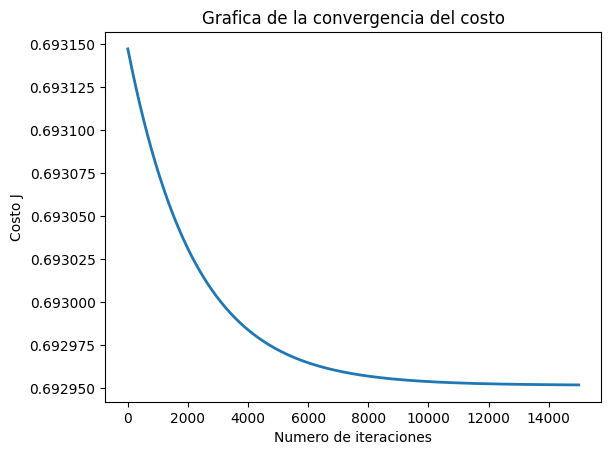

In [60]:
pyplot.plot(np.arange(len(J_historico_SR)), J_historico_SR, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Haciendo la prueba con un ejemplo

In [63]:
X_array_SR = [20,5.5,5.7,15.5,53,2,18,47.4,4.5,8,3,19,1]
X_array_copy_SR = X_array_SR.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array_SR[1:] = (X_array_SR[1:] - mu_SR) / sigma_SR

resultados_SR = sigmoid(np.dot(X_array_SR, theta_SR)) 

print(f"Una persona con las caracteristicas: {X_array_copy_SR} ")
print(f'Tiene una probabilidad de tener diabetes de: {resultados_SR * 100} %')

print(f"Con valores de theta: { theta_SR }")

Una persona con las caracteristicas: [20, 5.5, 5.7, 15.5, 53, 2, 18, 47.4, 4.5, 8, 3, 19, 1] 
Tiene una probabilidad de tener diabetes de: 51.54414395325807 %
Con valores de theta: [-0.00878234 -0.00102893 -0.01291402  0.00055428  0.01205503  0.0036655
  0.00214441  0.0209632  -0.01196745  0.0024896   0.01487508  0.01540254
  0.00168074]


##### 2.1.5.1 Definiendo nuestro umbral clasificador
Donde:

* Si $h(\theta)$ >= 0.5, predice "y = 1".
* Si $h(\theta)$ < 0.5 , predice "y = 0".

In [64]:
nombres_columnas = ['Soil_Moisture','Sunlight_Hours','Soil_pH','Ambient_Temperature','Fertilizer_Level','Plant_Type','Plant_Age','Plant_Height','Pesticide_Level','Air_Quality','Watering_Frequency','Days_Since_Last_Treatment','Plant_Health_Status','Plant_Health_Status(Si/No)']
matriz_datos_SR = np.array([
[30,2.4,4.5,16.7,33,3,20,38.9,5.1,7,3,13],
[22,5.3,5.4,18.3,28,2,21,40.1,6.2,8,4,15],
[18,4.5,4.5,17.5,31,3,24,44.5,8.2,9,3,16],
[16,6.5,6.2,15.3,29,2,31,47.2,9.1,5,5,17],
[26,4.2,8.3,14.9,24,2,41,41.2,6.7,7,7,18],
[30,5.3,7.4,16.4,25,2,51,39.2,5.7,6,5,16],
[32,7.5,6.8,19.4,31,1,31,38.3,8.3,8,6,15],
[42,9.1,7.1,18.4,34,3,21,40.1,9.3,5,8,17],
[29,5.8,8.2,17.3,26,4,31,47.4,7.5,8,7,18],
[14,9.4,6.9,16.4,31,2,32,29.4,8.4,9,8,19],
[24,4.6,6.4,19.2,34,1,21,27.8,9.3,5,6,17],
])

para_tabla = matriz_datos_SR.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre_SR = []

matriz_datos_SR = (matriz_datos_SR- mu_SR) / sigma_SR
matriz_datos_SR = np.concatenate([np.ones((len(matriz_datos_SR), 1)), matriz_datos_SR], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos_SR:
    y_pre_SR.append(sigmoid(np.dot(j, theta_SR)))

# Convertimos la lista a un array unidimensional

y_pre_SR = np.array(y_pre_SR)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral_SR = (y_pre_SR >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre_SR))
para_tabla = np.column_stack((para_tabla, y_pre_umbral_SR))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-----------------+------------------+-----------+-----------------------+--------------------+--------------+-------------+----------------+-------------------+---------------+----------------------+-----------------------------+-----------------------+------------------------------+
|   Soil_Moisture |   Sunlight_Hours |   Soil_pH |   Ambient_Temperature |   Fertilizer_Level |   Plant_Type |   Plant_Age |   Plant_Height |   Pesticide_Level |   Air_Quality |   Watering_Frequency |   Days_Since_Last_Treatment |   Plant_Health_Status |   Plant_Health_Status(Si/No) |
+=================+==================+===========+=======================+====================+==============+=============+================+===================+===============+======================+=============================+=======================+==============================+
|              30 |              2.4 |       4.5 |                  16.7 |                 33 |            3 |          20 |           38.9 | 

#### 2.1.6 Validaciones
Para hacer las validaciones correspondientes se hizo el uso siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

##### 2.1.6.1 Normalizamos el X_test que es el 20% separado a un incio:

In [65]:
X_norm_test_SR = (X_testSR- mu_SR) / sigma_SR

##### 2.1.6.2 Concadenamos unos a matriz X normalizado del test:

In [66]:
X_test_ready_SR = np.concatenate([np.ones((m_test_SR, 1)), X_norm_test_SR], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready_SR[i, 0],
    X_test_ready_SR[i, 1],
    X_test_ready_SR[i, 2],
    X_test_ready_SR[i, 3], 
    X_test_ready_SR[i, 4],
    X_test_ready_SR[i, 5], 
    X_test_ready_SR[i, 6],
    X_test_ready_SR[i, 7], 
    X_test_ready_SR[i, 8], 
    X_test_ready_SR[i, 9], 
    X_test_ready_SR[i, 10], 
    X_test_ready_SR[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000   1.086    -0.667    -1.617  -1.566  -1.424   1.152  -0.060   0.837    -1.631   1.018   0.304
   1.000   0.410     1.226    -0.440  -0.224   1.146   0.375  -1.485   1.430     0.820   0.425   1.475
   1.000  -0.985     0.364    -0.385   1.587  -0.274   0.763   0.347   1.087     1.155   0.072   0.890
   1.000   0.971     0.761    -0.049  -0.807   1.630  -1.567  -0.670  -1.618    -1.645   0.160  -0.868
   1.000   1.558    -0.745    -1.640  -1.110   0.805   0.375  -1.349   1.592     1.339  -0.539  -1.454
   1.000  -0.054     0.938    -0.783   1.225  -1.412   0.375   1.365   1.111    -0.349   1.678   0.304
   1.000   0.306    -1.684    -0.531   0.818   1.465  -0.402   0.076   0.427    -0.212  -1.712  -0.868
   1.000  -0.523     0.419    -1.608  -0.880   1.047   0.763  

##### 2.1.6.3 Hacemos el calculo de Y predicha 

In [67]:
y_predicha_SR =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready_SR:
    y_predicha_SR.append(sigmoid(np.dot(dato, theta_SR.T)))

# Convertimos la lista a un array unidimensional
y_predicha_SR = np.array(y_predicha_SR)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral_SR = (y_predicha_SR >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 140)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready_SR[i, 0],
    X_test_ready_SR[i, 1], 
    X_test_ready_SR[i, 2], 
    X_test_ready_SR[i, 3],
    X_test_ready_SR[i, 4], 
    X_test_ready_SR[i, 5], 
    X_test_ready_SR[i, 6],
    X_test_ready_SR[i, 7], 
    X_test_ready_SR[i, 8], 
    X_test_ready_SR[i, 9], 
    X_test_ready_SR[i, 10],
    X_test_ready_SR[i, 11], 
    y_predicha_CR[i], 
    y_umbral_CR[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000   1.086    -0.667    -1.617  -1.566  -1.424   1.152  -0.060   0.837    -1.631   1.018   0.304           0.50              0
   1.000   0.410     1.226    -0.440  -0.224   1.146   0.375  -1.485   1.430     0.820   0.425   1.475           0.49              0
   1.000  -0.985     0.364    -0.385   1.587  -0.274   0.763   0.347   1.087     1.155   0.072   0.890           0.50              1
   1.000   0.971     0.761    -0.049  -0.807   1.630  -1.567  -0.670  -1.618    -1.645   0.160  -0.868           0.49              0
   1.000   1.558    -0.745    -1.640  -1.110   0.805   0.375  -1.349   1.592     1.339  -0.539  -1.454           0.48              0
   1.000  -0.054     0.938    -0.783   1.225  -1.412 

##### 1.1.6.4 Calculando la precision del entrenamiento:
se hace uso del **np.mean**, Calcula la media (promedio) de los valores booleanos. Dado que True se interpreta como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de elementos iguales en **y_predicha** e **y_test**.

In [68]:
print('Precisión de entrenamiento: {:.5f} %'.format(np.mean(y_umbral_SR == y_testSR) * 100))

Precisión de entrenamiento: 50.45455 %


## Conclusiones

En esta parte se presentaran las conclusiones de acuerdo a las experiencias vistas en este laboratorio aplicando regularizacion y sin aplicar regularizacion.

##### 1. Impacto de la regularización en la precisión del modelo:

 Se observa que la regularización puede tener un efecto en la precisión del modelo. En algunos casos, la regularización puede mejorar la precisión del modelo al reducir el sobreajuste (overfitting),
 especialmente cuando se tienen conjuntos de datos pequeños o altamente ruidosos. 
 
 Sin embargo, en conjuntos de datos más grandes o con menos ruido, la regularización puede no proporcionar mejoras significativas en la precisión y podría incluso degradarla.

 Para este caso se hizo la comparacion entre la preciscion de ambos modelos, con y sin regularizacion:

| Modelo  | Precision del modelo con regularizacion| Presicion del modelo sin regularizacion| Dieferencia entre ambos|
|---------|------|---------|-----------|
| Regresion Logistica | 50.47619 %  | 50.45455 % | 0.02164 % |

Se puede notar que la diferencia entre ambos es poca, pero se puede notar que la precision del modelo con regularizar es un poco mas alta que su contraparte, pero esto nos da una idea que que al aplicar regularizacion la presicion llega a aumentar.